/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator


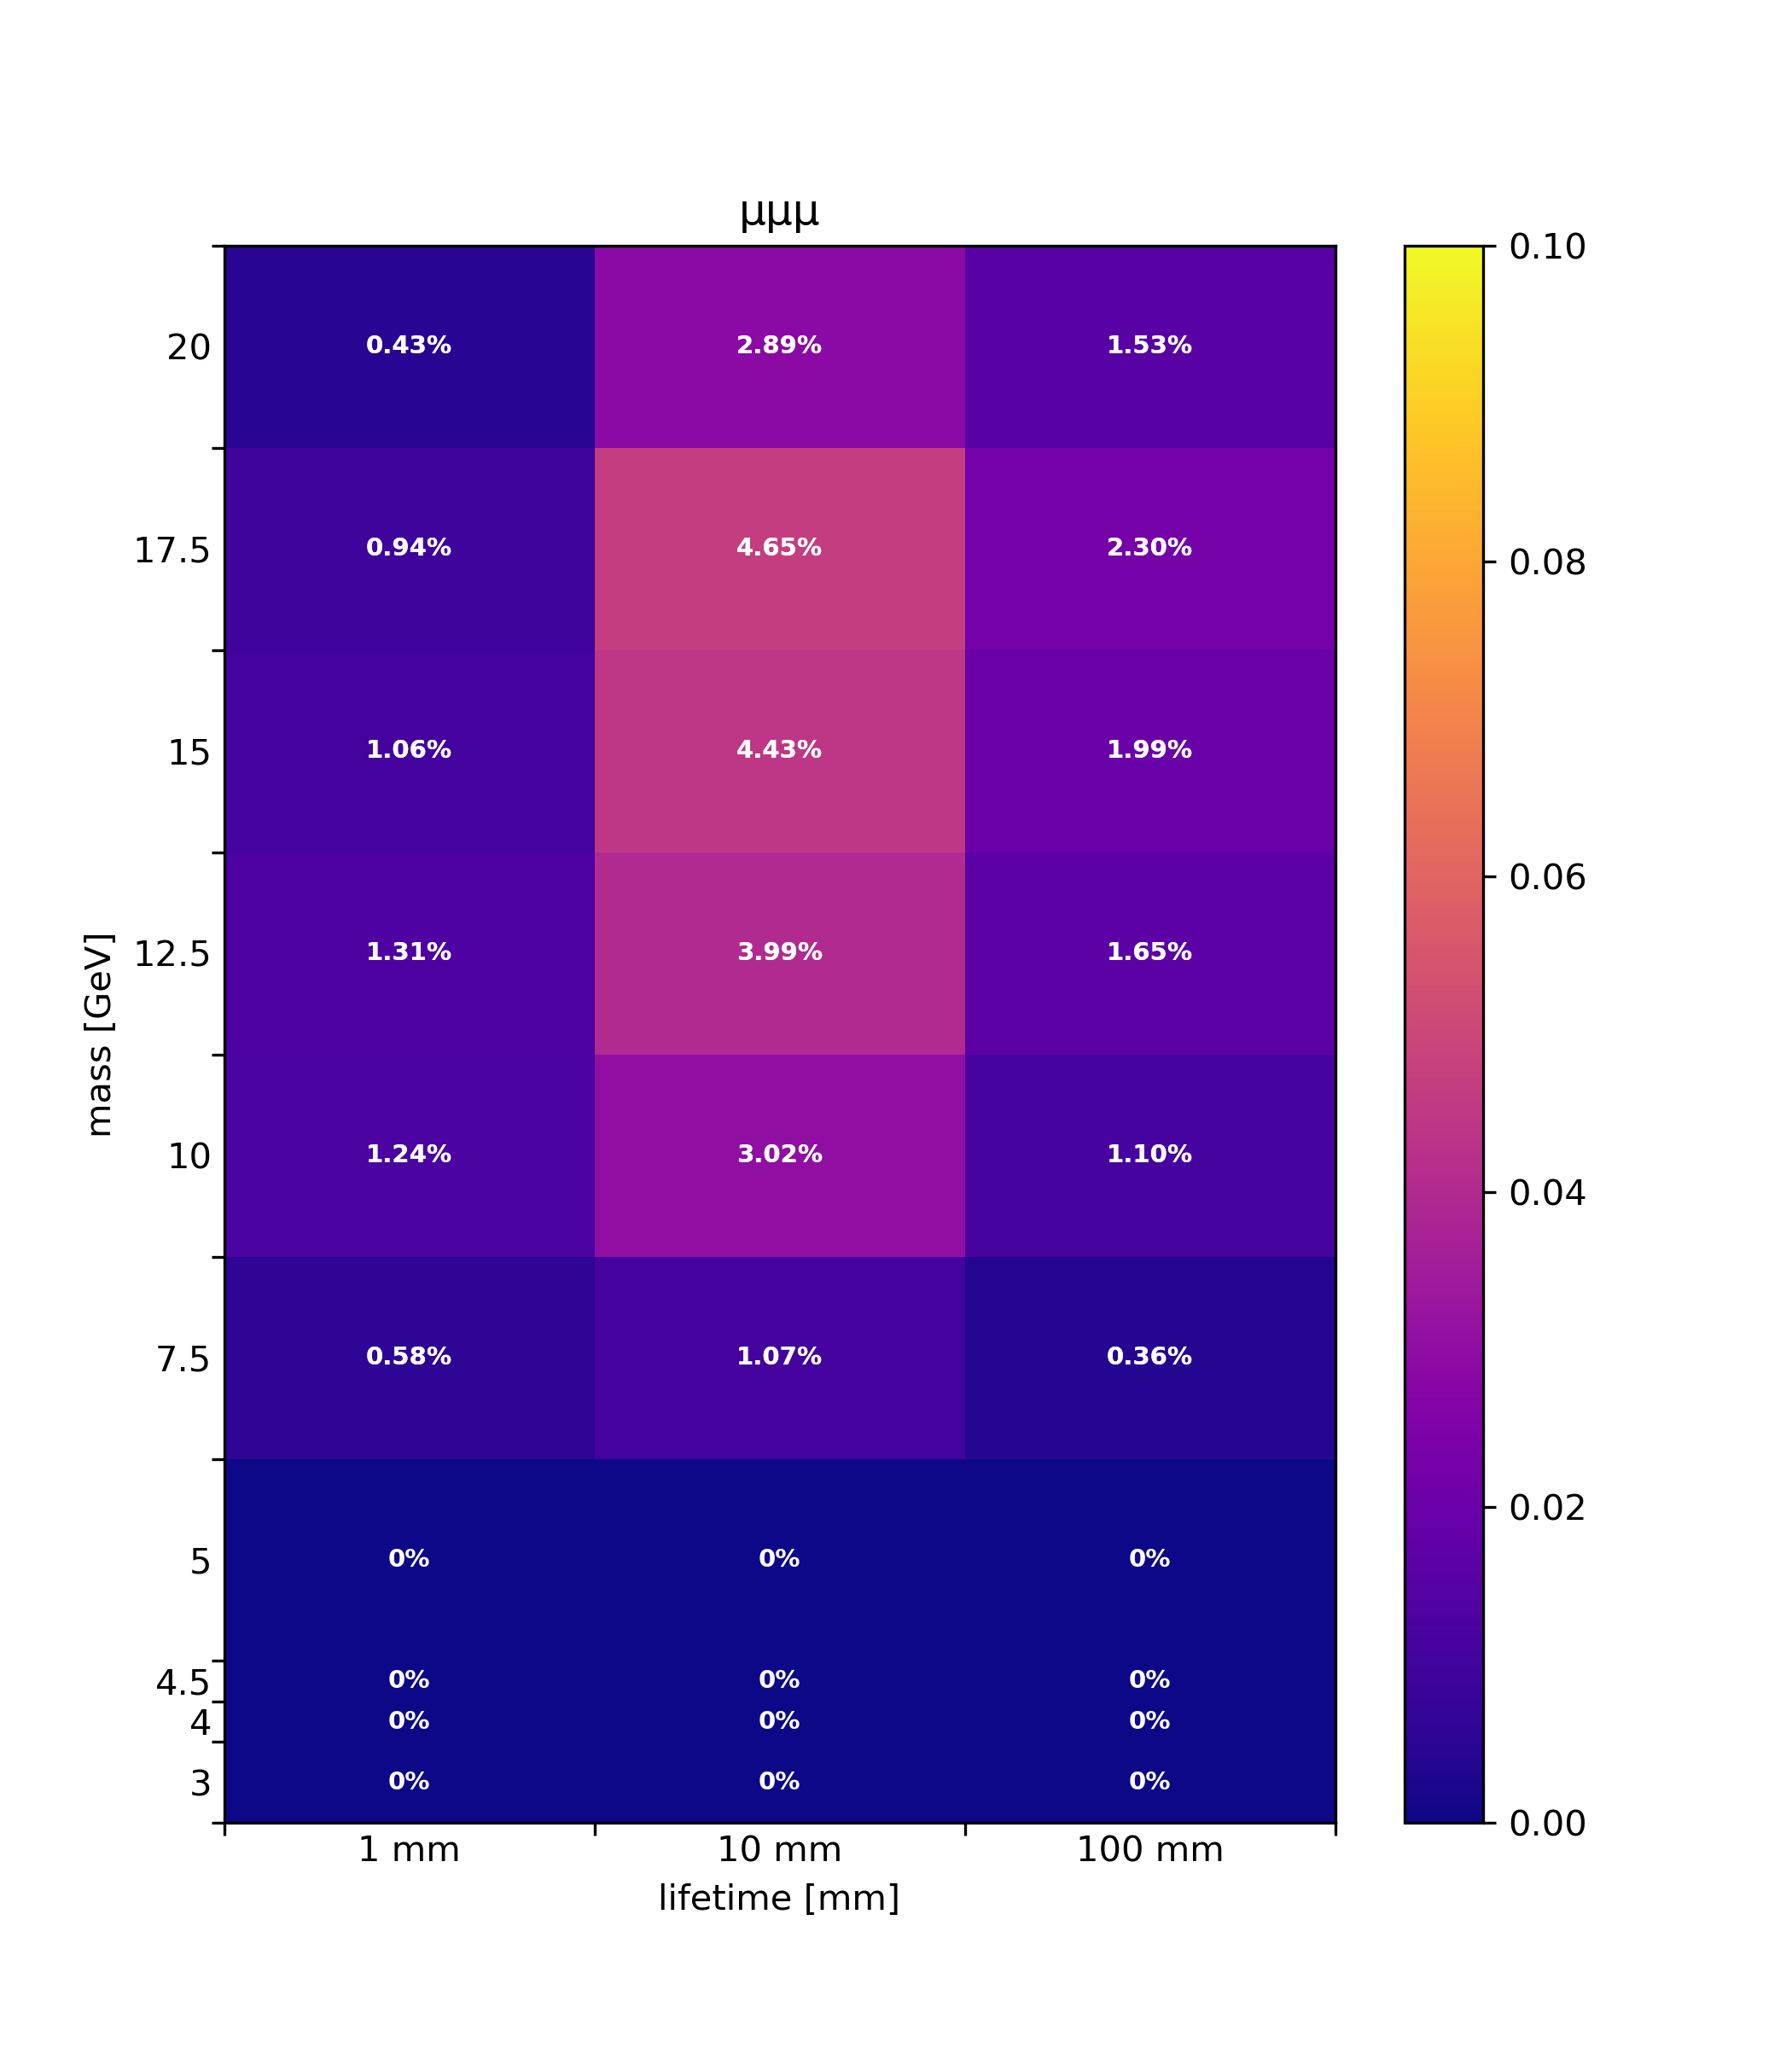

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator


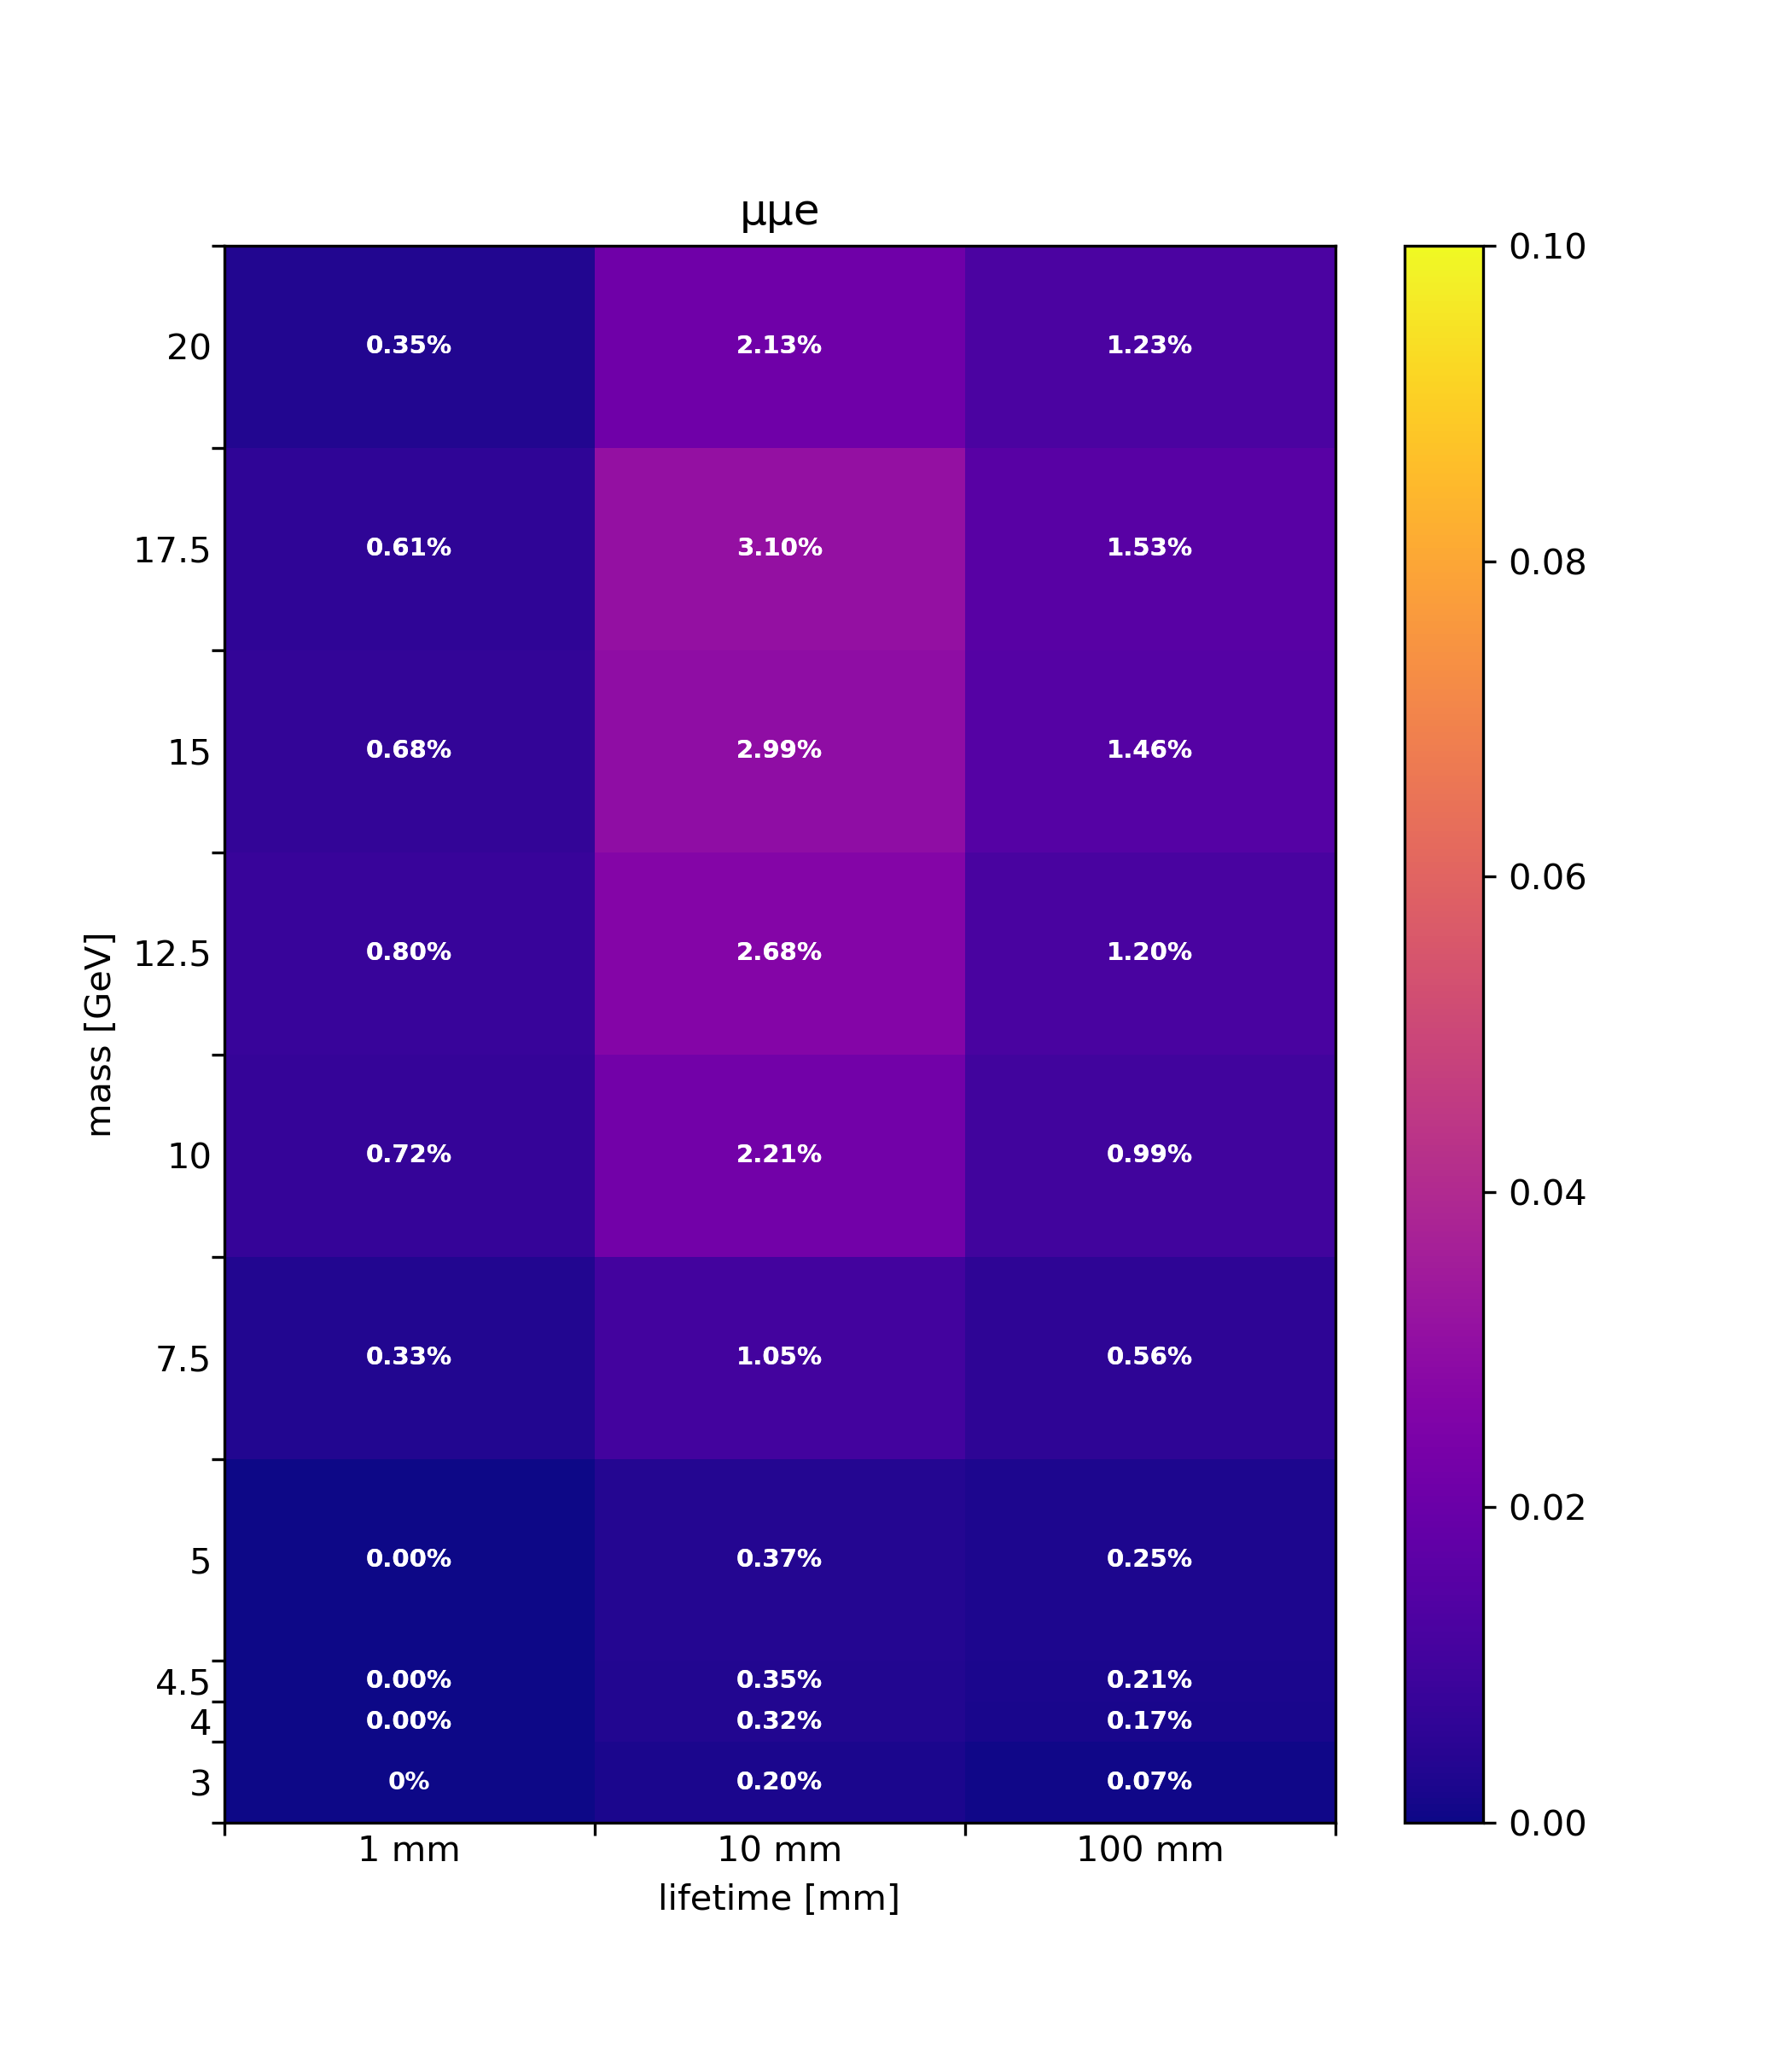

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator


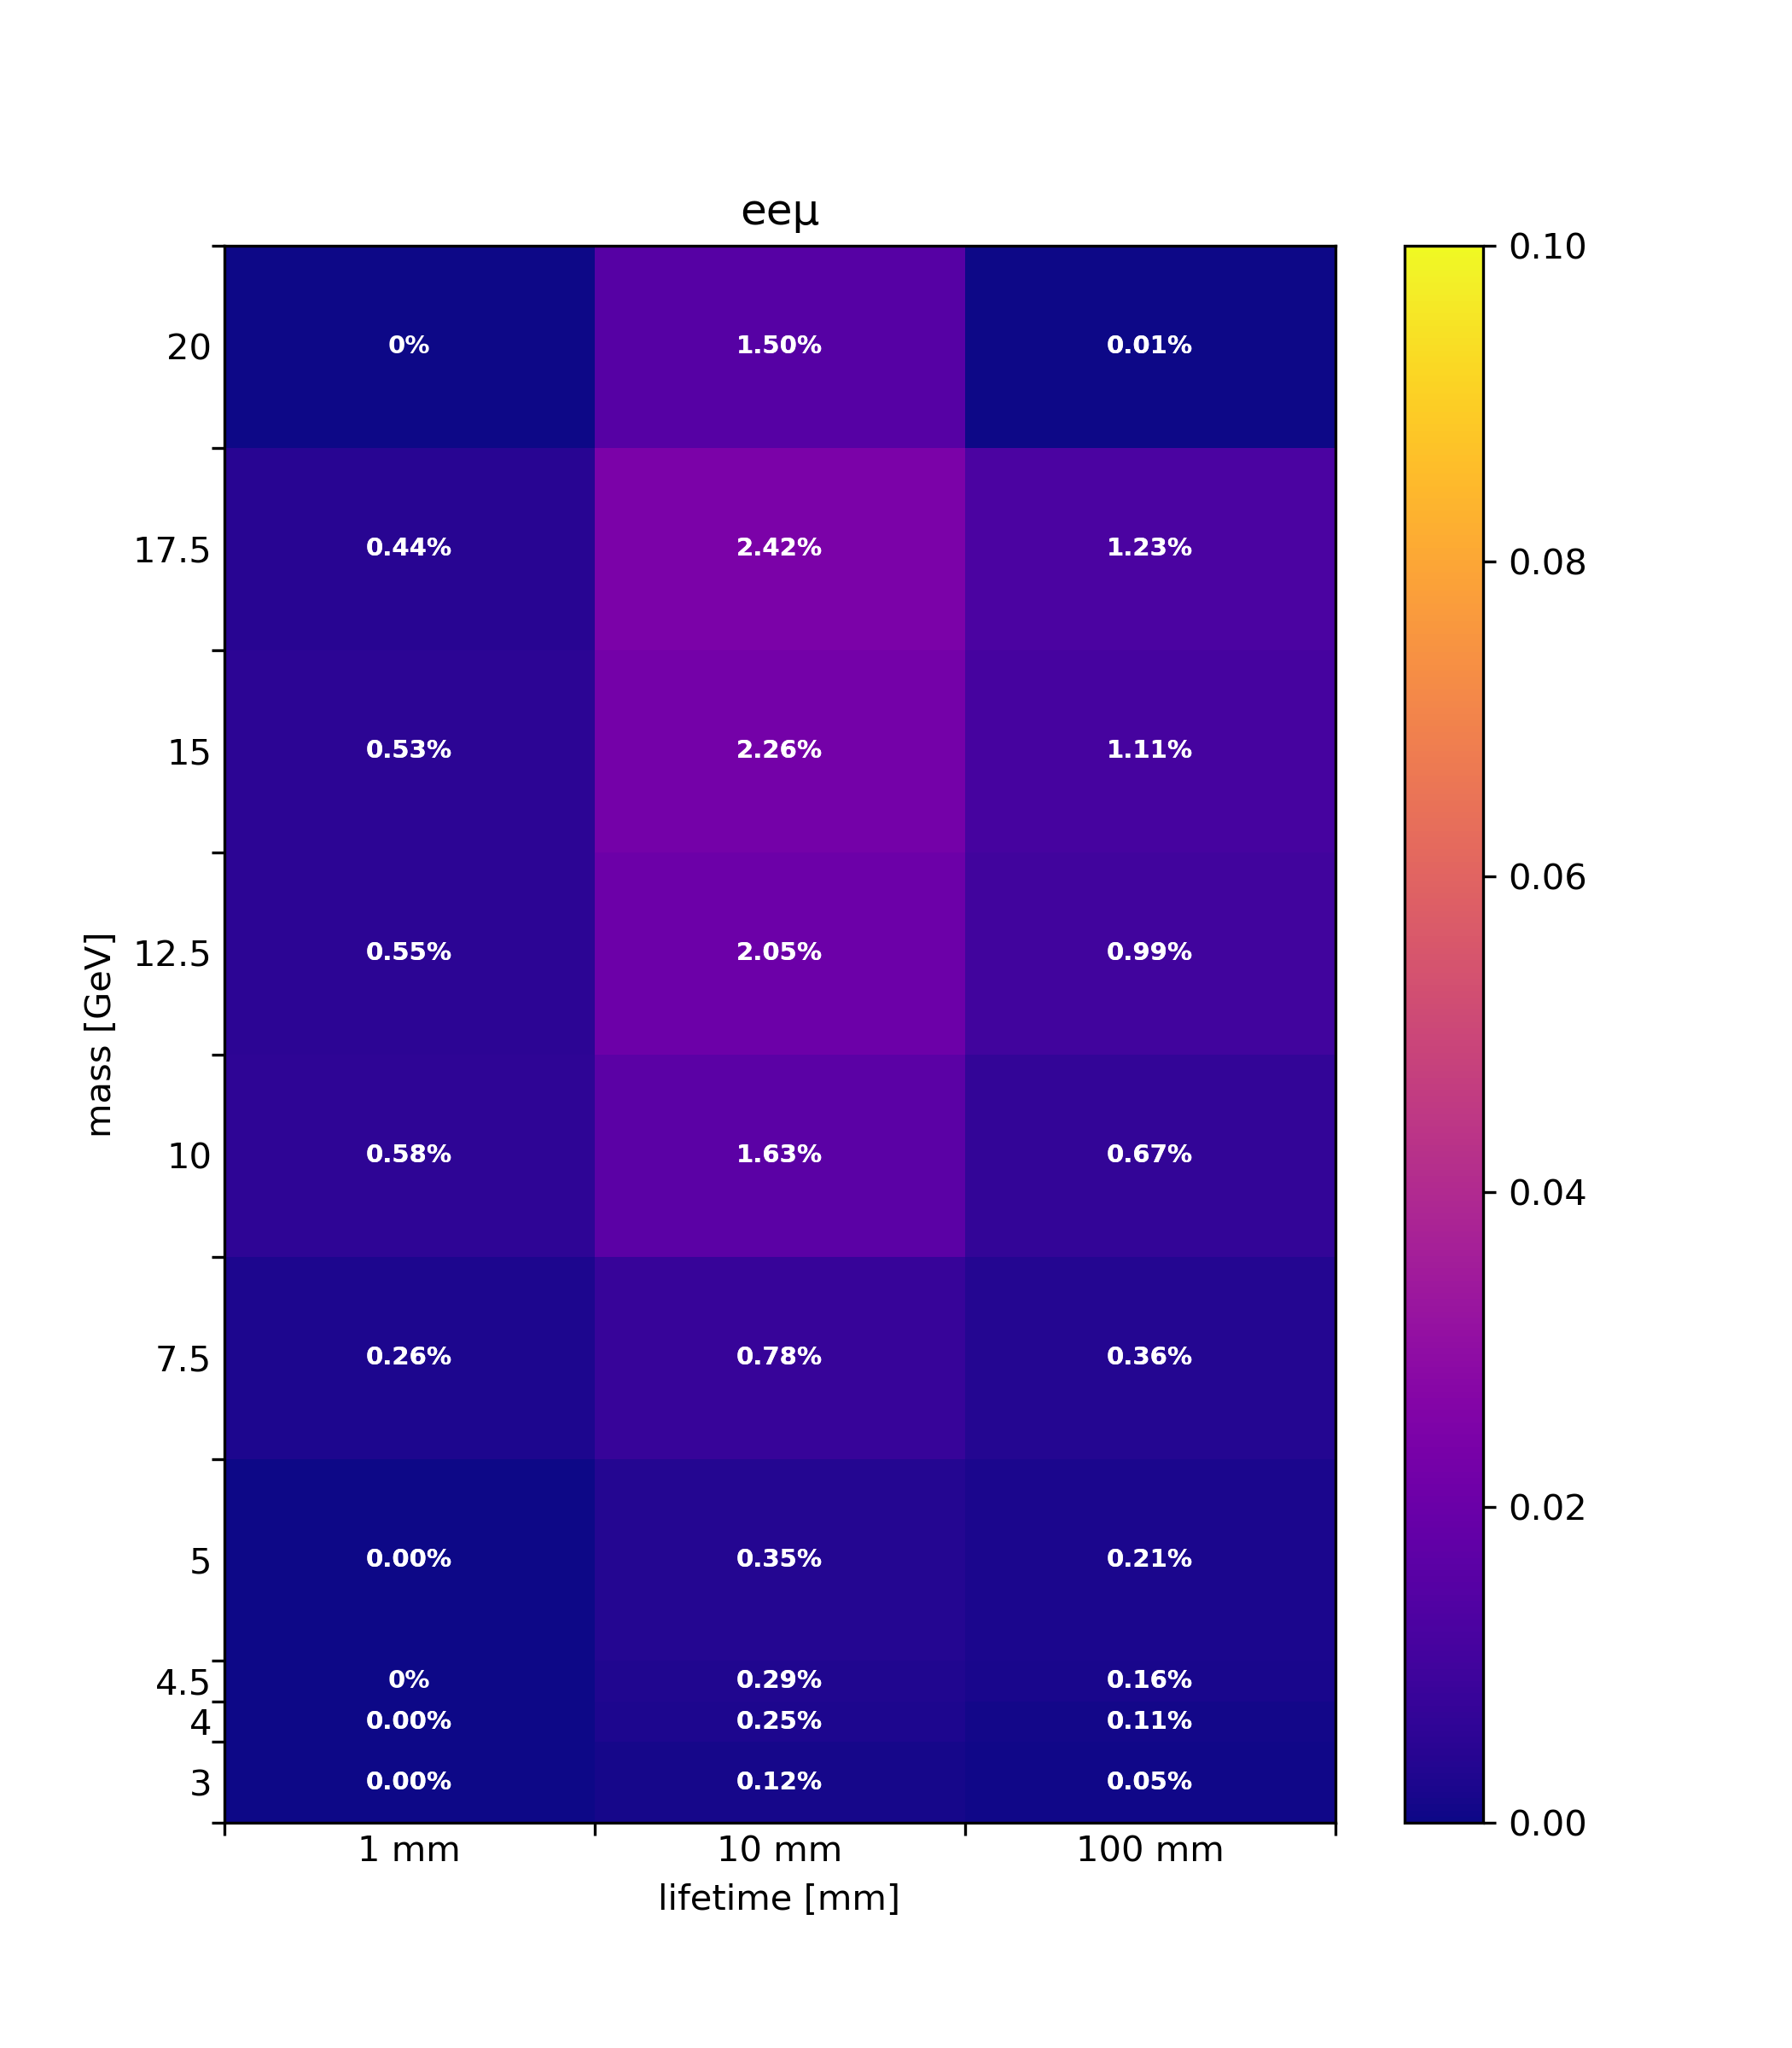

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator


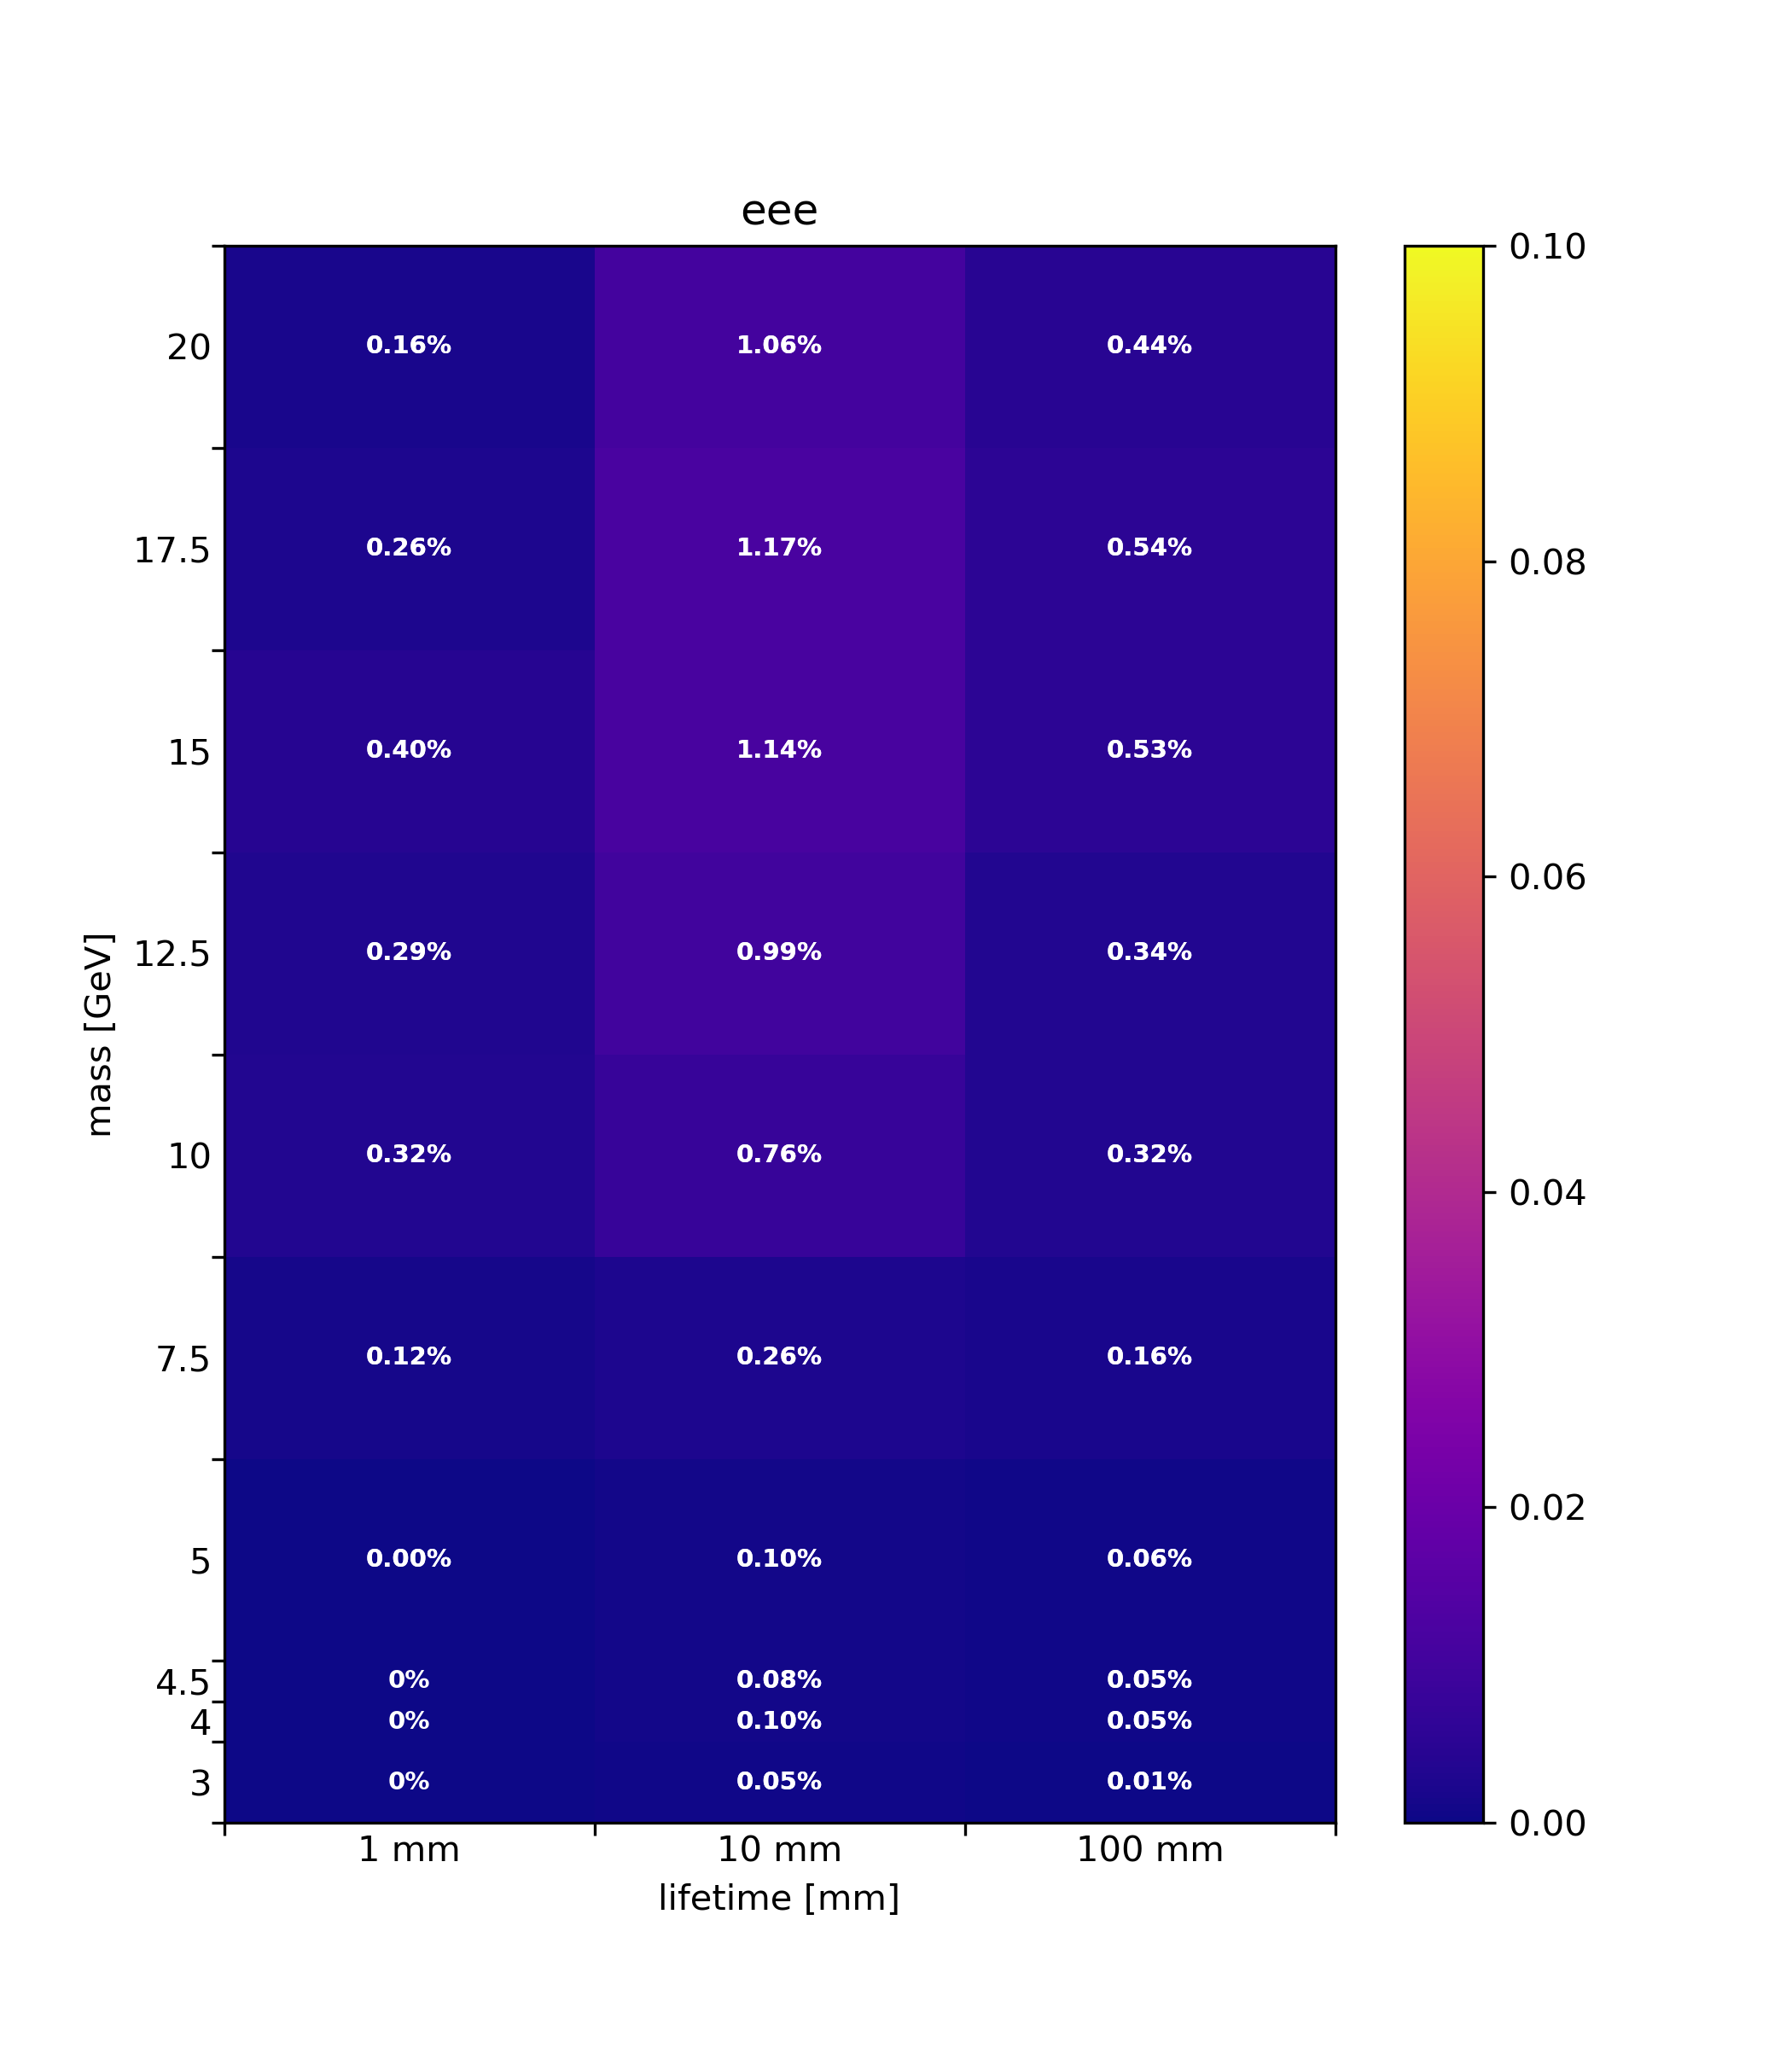

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator


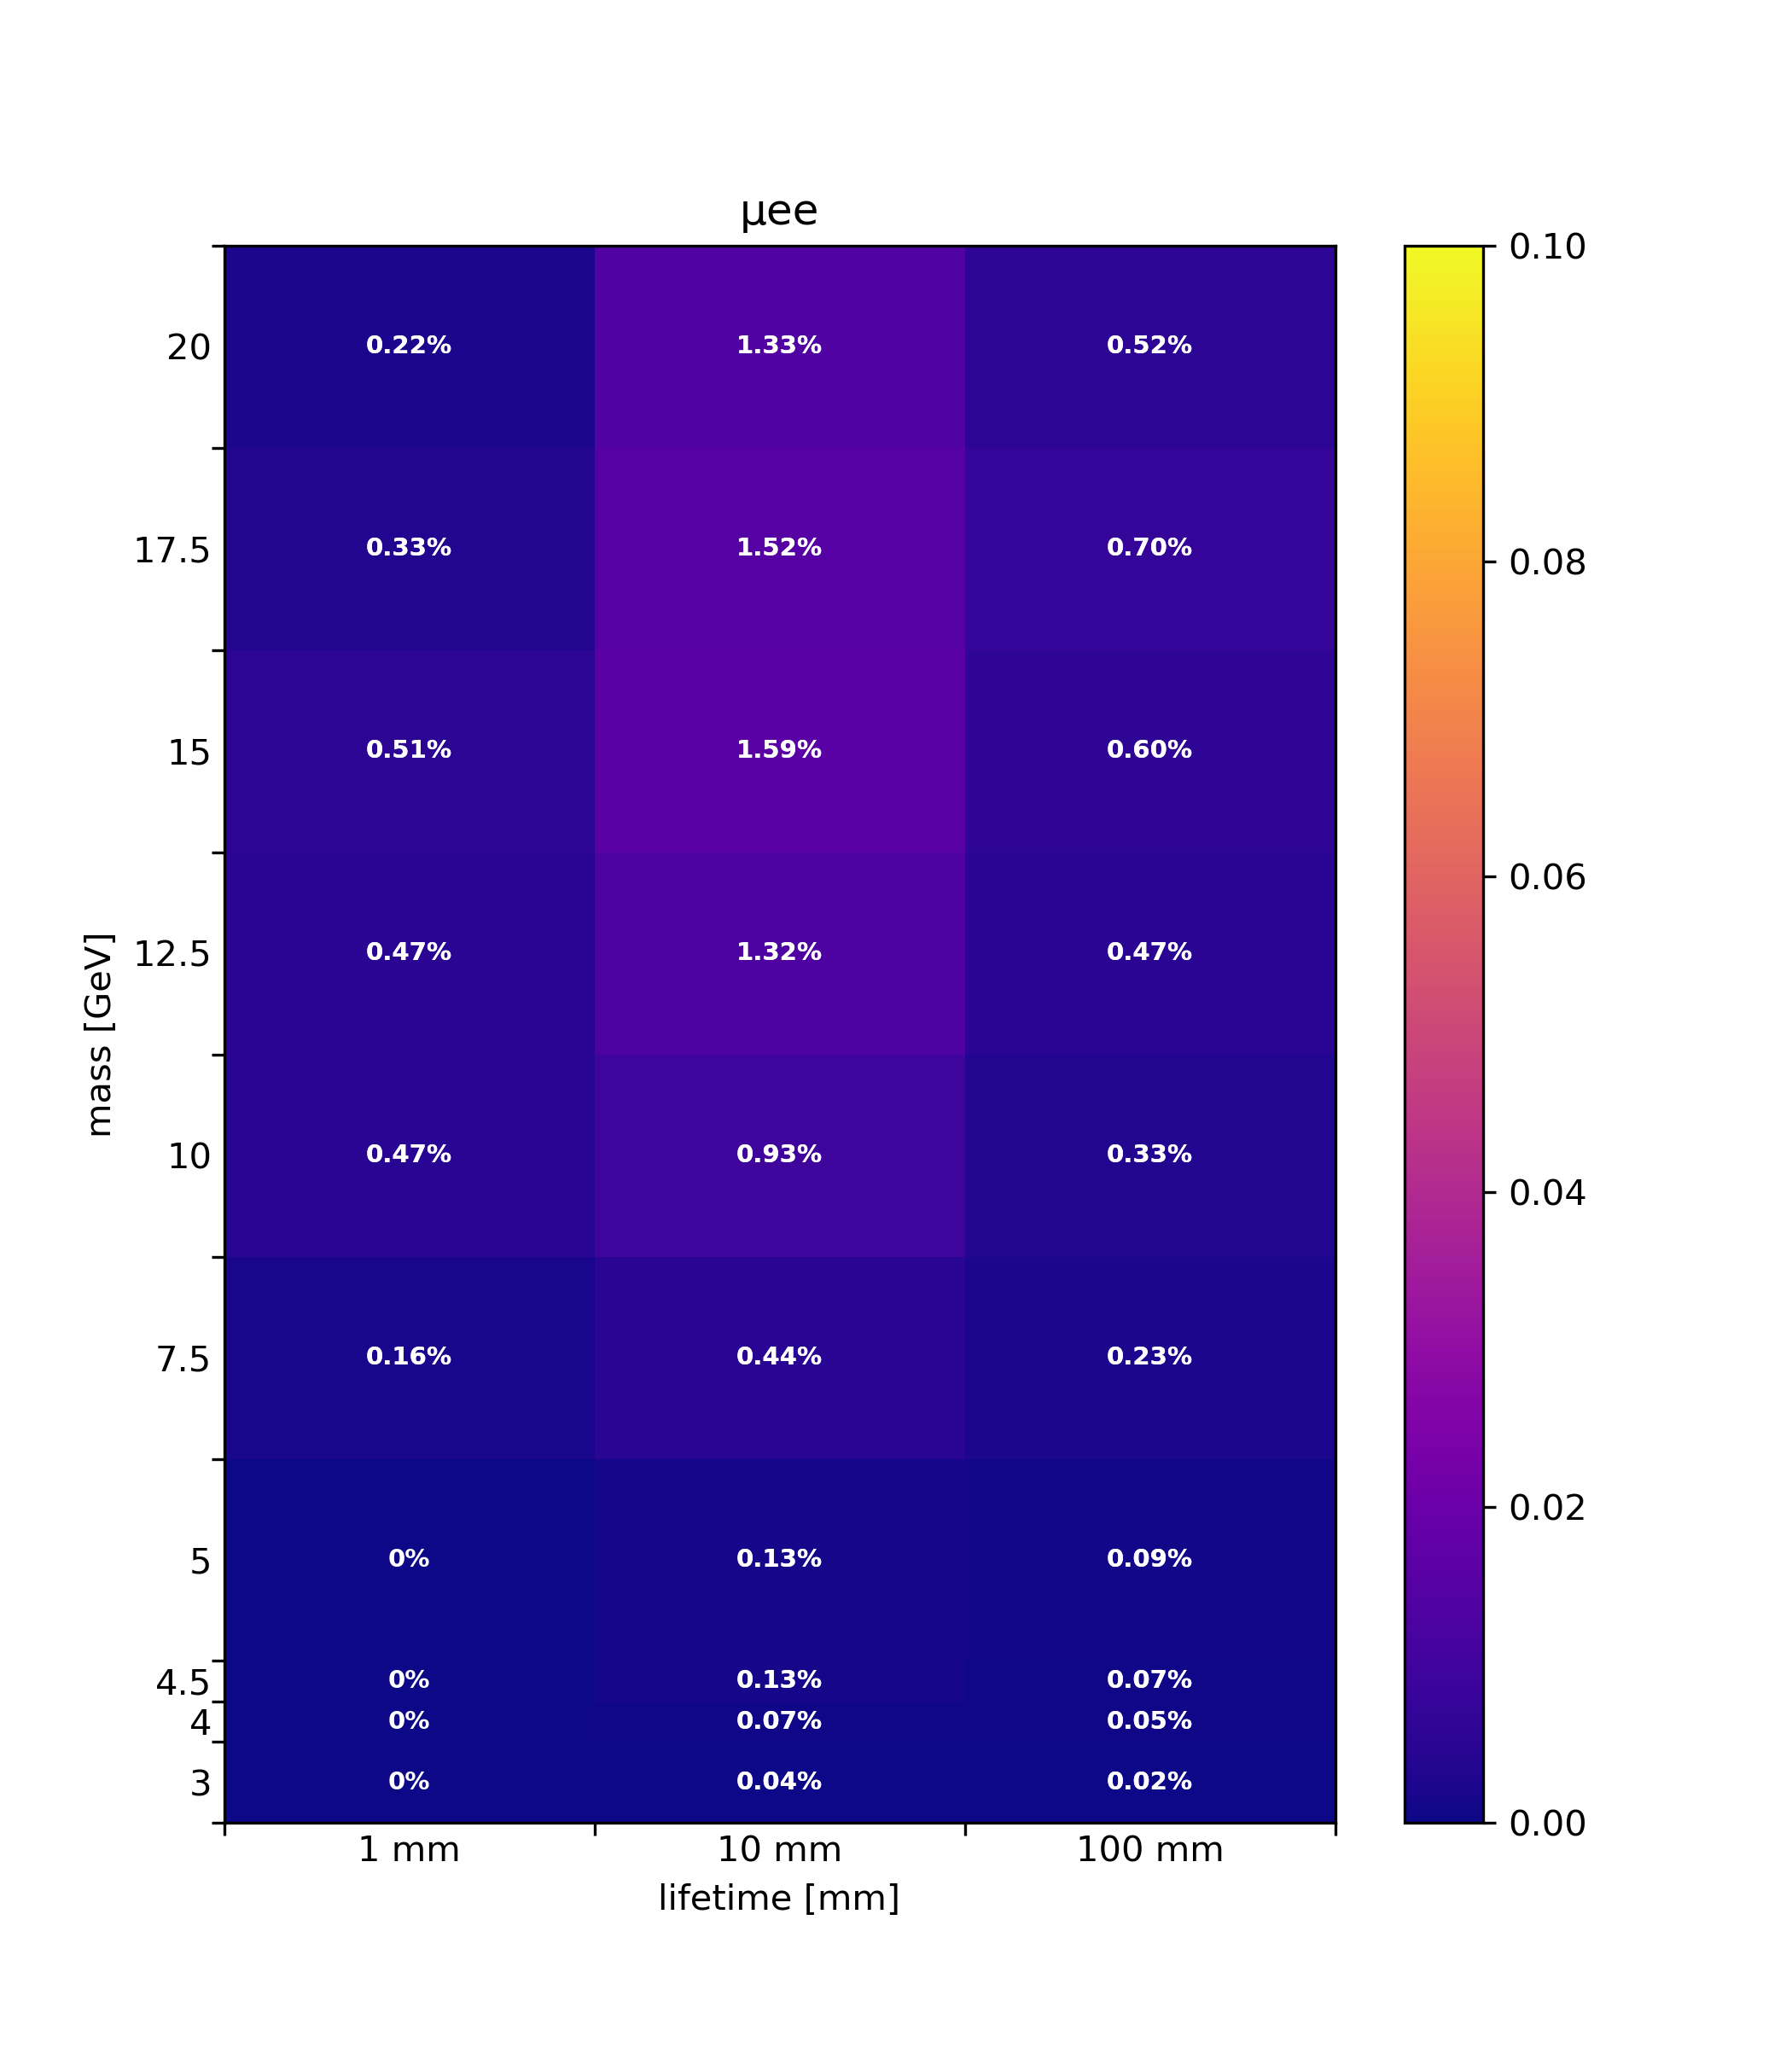

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator


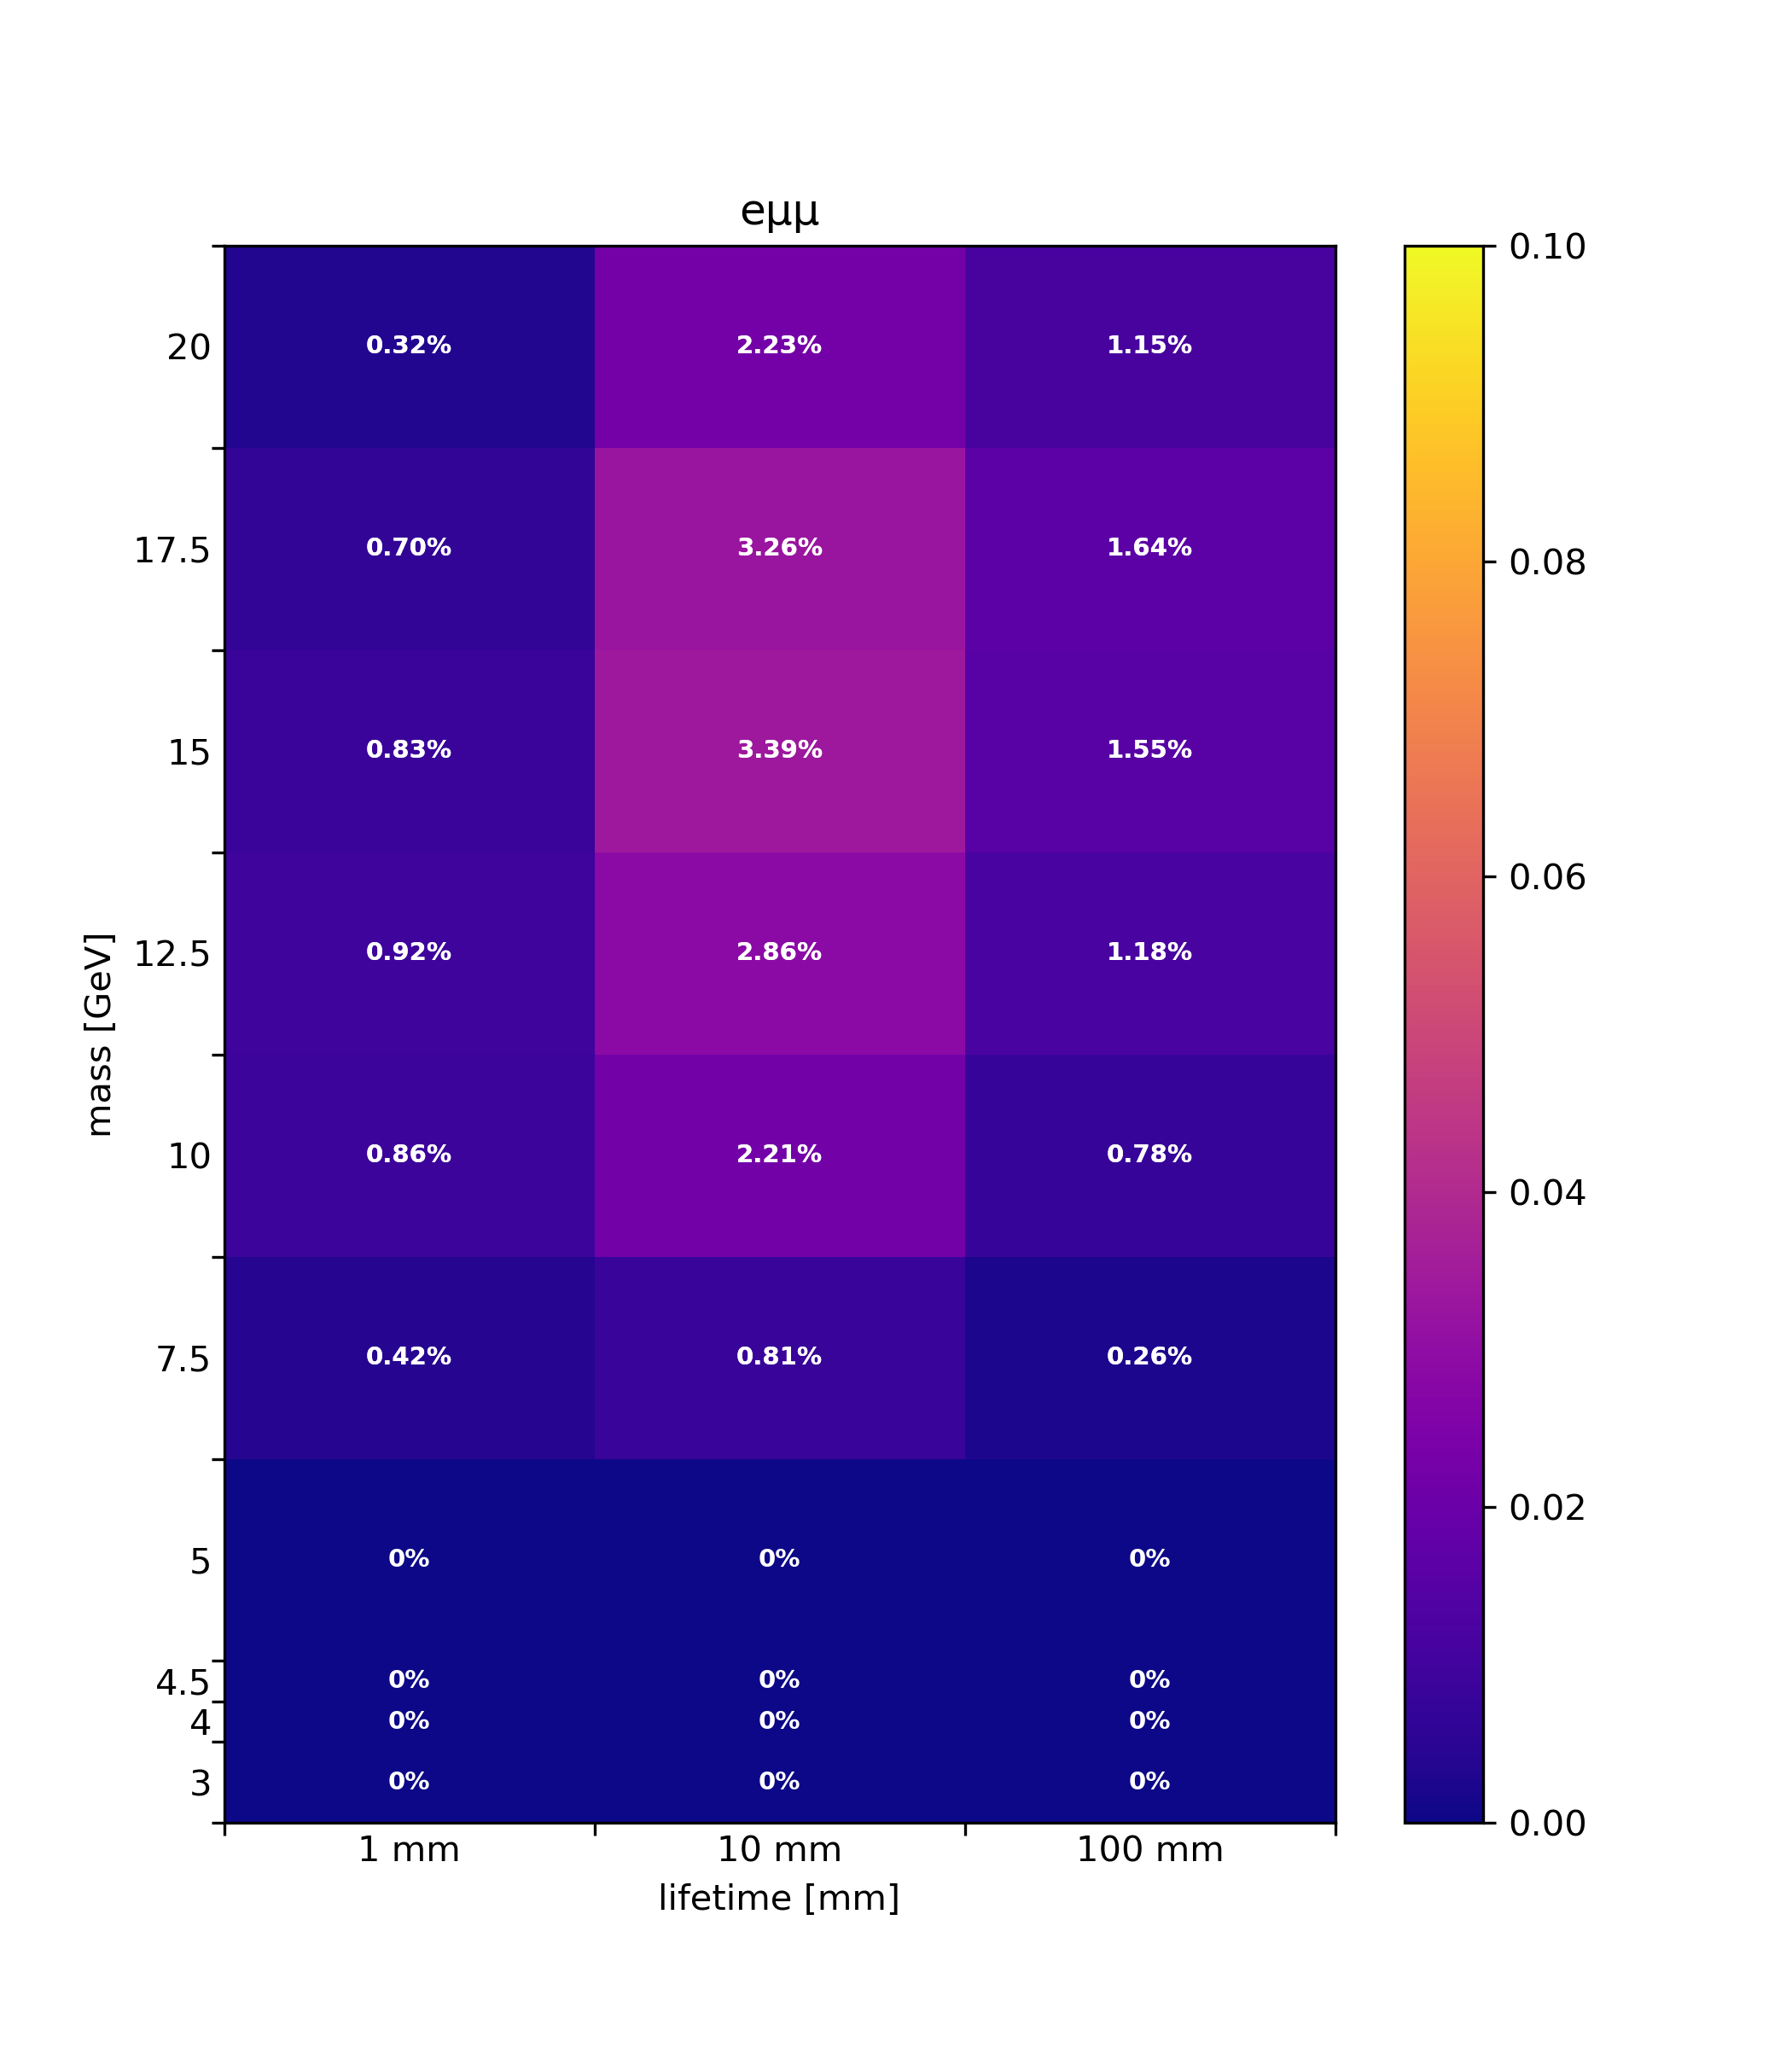

In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display, Image
import yaml


masses = [3, 4, 4.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5]
lifetimes = {1:0, 10:1, 100:2}

text_options = {
    'ha' : 'center',
    'va' : 'center',
    'fontweight' : 'bold',
    'fontsize': 7,
}

def set_bin_content(mass, lifetime, value, arr):
    ybin = np.max(np.digitize(mass, masses)-1, 0)
    xbin = lifetimes[lifetime]
    arr[ybin,xbin] = value

def make_uncertainty_plot(histpath, title, outfile):

    count_arr = np.array([
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    ])

    count_arr_1 = np.array(count_arr)

    # get bins from ntuples    
    for hist_file in glob.glob(f'{indir_1}{histpath}'):
        try:
            f_fullrun2_1 = uproot.open(hist_file)
        except Exception as e: 
            print(e)

        count_1 = -100
        try:
            if weighted: count_1 = f_fullrun2_1['nominal/VSI_LeptonsMod/CutFlow/CutFlow_weighted_one_hnl_dirac'].pandas()[1:-1].iloc[-3]['count']
            else: count_1 = len(f_fullrun2_1['nominal_VSI_LeptonsMod_ntuples_LNC_plus_LNV_mHNL']['HNLm'])
        except: 
            count_1 = 0

        count_1 = count_1

        # get sample info from filename
        tokens = hist_file.split('histograms_fullrun2_')[1].split('_')
        file_mass = float(tokens[0][:-1].replace('p','.'))
        file_lifetime = int(tokens[1].split('mm')[0])

        set_bin_content(file_mass, file_lifetime, count_1, count_arr_1)


    # do the plotting
    plot_uncertainties(count_arr_1/5e4, title, outfile)
    return count_arr_1

def plot_uncertainties(count_arr_1, title, outfile):
    plt.figure(figsize=[7,8])
    plt.pcolormesh([0,1,2,3], masses, count_arr_1, vmin=0, vmax=.1, cmap='plasma') # <<<<<<<<<<<<
    plt.colorbar()
    ax = plt.gca()

    # mess with x ticks
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels('')
    ax.set_xticklabels(['1 mm', '10 mm', '100 mm',], minor=True)
    ax.set_xticks([0.5,1.5,2.5,], minor=True)
    ax.tick_params(axis='both', which='minor', length=0)

    # mess with y ticks
    ax.set_yticks(masses)
    ax.set_yticklabels('')
    ax.tick_params(which='minor', length=0)
    ax.set_yticks(masses[:-1] + np.diff(masses)/2, minor=True)
    ax.set_yticklabels(masses[:-1], minor=True)

    ax.set_title(title)
    ax.set_xlabel('lifetime [mm]')
    ax.set_ylabel('mass [GeV]')

    # set text
    for i in range(len(masses)-1):
        for j in range(len(lifetimes)):
            yloc = j+.5
            xloc = masses[i] + (masses[i+1]-masses[i])/2
            if count_arr_1[i,j] > 0:
                delim = '\n' if masses[i] >= 5 else ' : '
                text = f'{count_arr_1[i,j]:0.2%}'
                ax.text(yloc, xloc , text, color='white', transform=ax.transData, **text_options)
            elif count_arr_1[i,j] == 0:
                text = f'{int(count_arr_1[i,j]):.0%}'
            else:
                text = f'no sig.'
            ax.text(yloc, xloc , text, color='white', transform=ax.transData, **text_options)

    os.makedirs(outdir, exist_ok=True)
    plt.savefig(outdir+outfile+'.png', dpi=300)
    plt.savefig(outdir+outfile+'.pdf', dpi=300)

weighted = False
indir_1 = '/data/hnl/histograms/v9p3_histograms/'
outdir = '/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/hepdata/plots/'

uuu_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_uuu.root', title='μμμ', outfile='efficiency_uuu')
display(Image(filename=f'{outdir}efficiency_uuu.png'));

uue_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_uue.root', title='μμe', outfile='efficiency_uue')
display(Image(filename=f'{outdir}efficiency_uue.png'));

eeu_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_eeu.root', title='eeμ', outfile='efficiency_eeu')
display(Image(filename=f'{outdir}efficiency_eeu.png'));

eee_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_eee.root', title='eee', outfile='efficiency_eee')
display(Image(filename=f'{outdir}efficiency_eee.png'));

uee_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_uee.root', title='μee', outfile='efficiency_uee')
display(Image(filename=f'{outdir}efficiency_uee.png'));

euu_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_euu.root', title='eμμ', outfile='efficiency_euu')
display(Image(filename=f'{outdir}efficiency_euu.png'));

In [2]:
for counts in [
    uuu_counts,
    uue_counts,
    eeu_counts,
    eee_counts,
    uee_counts,
    euu_counts,
    ]:

    divisor = 1
    divisor = 5e4

    tmp_dict = {
        '1mm'   : (np.flipud(counts)[:,0]/divisor).tolist(),
        '10mm'  : (np.flipud(counts)[:,1]/divisor).tolist(),
        '100mm' : (np.flipud(counts)[:,2]/divisor).tolist(),
        'masses': list(reversed(masses)),
    }
    print()
    print(yaml.dump(tmp_dict, sort_keys=False))


1mm:
- 0.00432
- 0.00936
- 0.01056
- 0.01308
- 0.01236
- 0.00582
- 0.0
- 0.0
- 0.0
- 0.0
10mm:
- 0.0289
- 0.04652
- 0.04434
- 0.03992
- 0.0302
- 0.01068
- 0.0
- 0.0
- 0.0
- 0.0
100mm:
- 0.01532
- 0.02304
- 0.01992
- 0.01652
- 0.011
- 0.00356
- 0.0
- 0.0
- 0.0
- 0.0
masses:
- 22.5
- 20
- 17.5
- 15
- 12.5
- 10
- 7.5
- 5
- 4.5
- 4
- 3


1mm:
- 0.00346
- 0.0061
- 0.00684
- 0.00802
- 0.00722
- 0.00328
- 2.0e-05
- 2.0e-05
- 2.0e-05
- 0.0
10mm:
- 0.0213
- 0.03096
- 0.02992
- 0.0268
- 0.02212
- 0.01046
- 0.00368
- 0.00346
- 0.00324
- 0.00198
100mm:
- 0.01226
- 0.0153
- 0.01456
- 0.01198
- 0.00986
- 0.0056
- 0.00246
- 0.00206
- 0.00172
- 0.00072
masses:
- 22.5
- 20
- 17.5
- 15
- 12.5
- 10
- 7.5
- 5
- 4.5
- 4
- 3


1mm:
- 0.0
- 0.0044
- 0.00534
- 0.00546
- 0.00584
- 0.00262
- 4.0e-05
- 0.0
- 2.0e-05
- 2.0e-05
10mm:
- 0.01496
- 0.02424
- 0.0226
- 0.02048
- 0.01634
- 0.00778
- 0.00354
- 0.00288
- 0.00254
- 0.00124
100mm:
- 0.00014
- 0.01226
- 0.0111
- 0.00994
- 0.00674
- 0.0036
- 0.00214
- 0.0015